# K-Nearest Neighbors Classifiers

This is an introduction to learning via similarity using the Nearest Neighbor technique.

The KNN model calculates the *Euclidean distance* from a point to all the known samples.  In the simplest case, Nearest Neighbor (k=1), the test point is labeled the same as the closest known sample point.  The number of sample points to use (k) is customizeable for a model.  When k > 1, then the test point is labeled the same as a majority of it's k-nearest neighbors.

**Euclidean distance:**
$$\sqrt{(x_1 - w_1)^2 + ... + (x_n - w_n)^2}$$


## Lesson goals
In this lesson, we will implement a couple KNN models in SKLearn, then visualize the model space, and finally build a KNN model from scratch.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.neighbors import KNeighborsClassifier
import math

%matplotlib inline

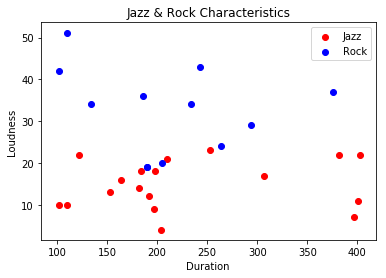

In [10]:
# Creating fictional music data to model - jazz and rock songs

music = pd.DataFrame()

music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]

music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# Labeling songs as jazz or not
music['jazz'] = [1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                 1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color = 'red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color = 'blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz & Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()


In [12]:
# Instantiating the KNN model (k=1)
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music['jazz']
neighbors.fit(X, Y)

# Predicting a single point as an example
neighbors.predict([[24, 190]])

array([0])

The model (k=1) predicts that the point ('loudness': 24, 'duration': 190) is a rock song, because the closest known sample to that point is a rock song.

Now we'll increase k to 5.  The model will implicitly assign probabilities for each label_class and use the most probable label_class as it prediction for a given point.

In [15]:
# Instantiating the KNN model (k=5)
neighbors_k5 = KNeighborsClassifier(n_neighbors=5)
neighbors_k5.fit(X, Y)

# Predicting the same point as the k=1 model
print('Predicted class: ', neighbors_k5.predict([[24, 190]]))
print('Class probabilities: Rock = {}, Jazz = {}'.format(
    neighbors_k5.predict_proba([[24, 190]])[0][0],
    neighbors_k5.predict_proba([[24, 190]])[0][1]
))

Predicted class:  [1]
Class probabilities: Rock = 0.4, Jazz = 0.6


If we predicted a grid of points across our sample space, we could create a map of the model -- that's what we'll do now.

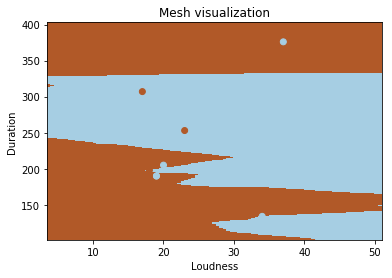

In [26]:
# Converting data to np arrays for np functionality
X = np.array(X)
Y = np.array(Y)

# Mesh size
h = 0.5

# Creating the bounding box for the gridpoints
x_min = X[:, 0].min() - 0.5
x_max = X[:, 0].max() + 0.5
y_min = X[:, 1].min() - 0.5
y_max = X[:, 1].max() + 0.5

# Creating the gridpoints
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors_k5.predict(np.c_[xx.ravel(), yy.ravel()])

# Plotting the results
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z) # change shading='gouraud' to feather the edges

# Add the training points to the plot
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()


This plot highlights the outlier points - those which fall into areas of the opposite label.



## KNN algorithm from scratch

Now I'll code an KNN algorithm from scratch and use the music data from above to test it's performance.

In [82]:
def KNN(data,k,xy_test):
    '''K-Nearest Neighbors classifier, where the input data is 2 dimensional and in a
    DataFrame with X,Y,Z as columns 0,1,2. k can be any integer less than the length 
    of the training set. xy_test is a tuple containing the individual test point 
    in (x,y) format.
    '''
    x = data.iloc[:, 1]
    y = data.iloc[:, 0]
    x_test = xy_test[1]
    y_test = xy_test[0]
    
    data['eu_dist'] = np.sqrt((x-x_test) ** 2 + (y-y_test) ** 2)
    data_sorted = data.sort_values('eu_dist')[:k]
    votes = data_sorted.iloc[:, 2].sum() / k
    
    if votes > 0.5:
        return 1, votes
    else:
        return 0, votes

In [83]:
KNN(music, 5, (190,24))

(1, 0.6)